# Feature scaling and Learning Rate (Multi-variable)

## Goals
- Utilize  the multiple variables routines 
- run Gradient Descent on a data set with multiple features
- explore the impact of the *learning rate alpha* on gradient descent
- improve performance of gradient descent by *feature scaling* using z-score normalization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import  load_house_data, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

#  Problem Statement

We will use the motivating example of housing price prediction. The training data set contains many examples with 4 features (size, bedrooms, floors and age) shown in the table below. Note, the Size feature is in sqft.

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 

##  Dataset: 
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|----------------------- |  
| 952             | 2                   | 1                | 65           | 271.5                  |  
| 1244            | 3                   | 2                | 64           | 232                    |  
| 1947            | 3                   | 2                | 17           | 509.8                  |  
| ...             | ...                 | ...              | ...          | ...                    |


In [3]:
#load the dataset
X_train,y_train = load_house_data()

In [4]:
X_features = ['Size (sqft)','Number of Bedrooms','Number of floors','Age of Home']

Let's view the dataset and its features by plotting each feature versus price.

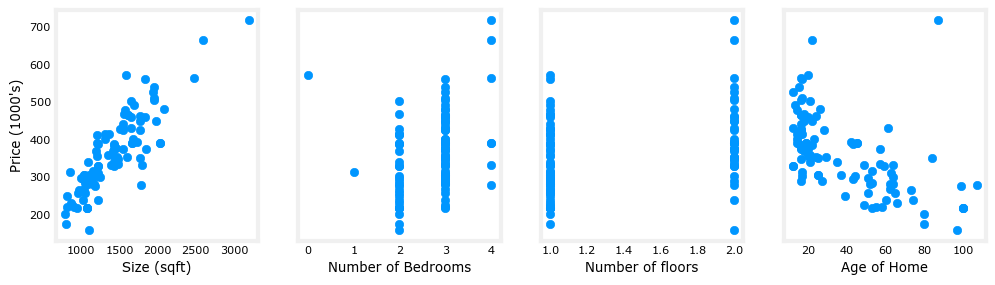

In [5]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

<a name="toc_15456_5"></a>
## Gradient Descent With Multiple Variables
Here are the equations on gradient descent for multiple variables.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


# Learning Rate
The learning rate controls the size of the update to the parameters.

𝛼
  = 9.9e-7

In [6]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

It appears the learning rate is too high. The solution does not converge. Cost is increasing rather than decreasing. Let's plot the result:

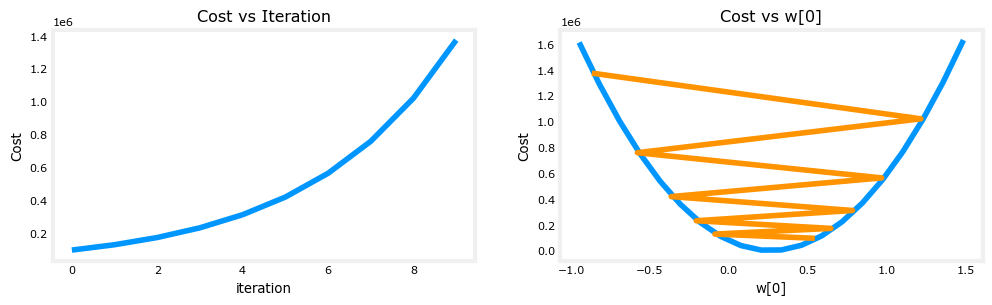

In [7]:
plot_cost_i_w(X_train, y_train, hist)

The plot on the right shows the value of one of the parameters,  𝑤0
 . At each iteration, it is overshooting the optimal value and as a result, cost ends up increasing rather than approaching the minimum. Note that this is not a completely accurate picture as there are 4 parameters being modified each pass rather than just one. This plot is only showing  𝑤0
  with the other parameters fixed at benign values. In this and later plots you may notice the blue and orange lines being slightly off.


### $\alpha$ = 9e-7
Let's try a bit smaller value and see what happens.

In [8]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

Cost is decreasing throughout the run showing that alpha is not too large.

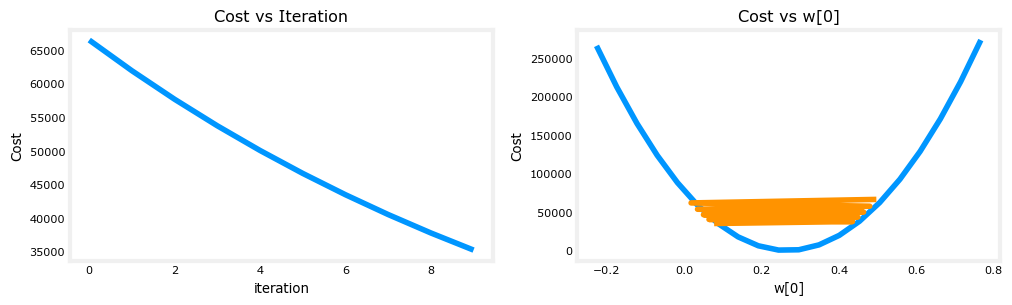

In [9]:
plot_cost_i_w(X_train, y_train, hist)

On the left, you see that cost is decreasing as it should. On the right, you can see that $w_0$ is still oscillating around the minimum, but the cost is decreasing with every iteration rather than increasing. Note above that `dj_dw[0]` changes sign with each iteration as `w[0]` jumps over the optimal value.
This alpha value will converge. You can vary the number of iterations to see how it behaves.

### $\alpha$ = 1e-7
Let's try a bit smaller value for $\alpha$ and see what happens.

In [10]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

Cost is decreasing throughout the run showing that  𝛼
  is not too large.

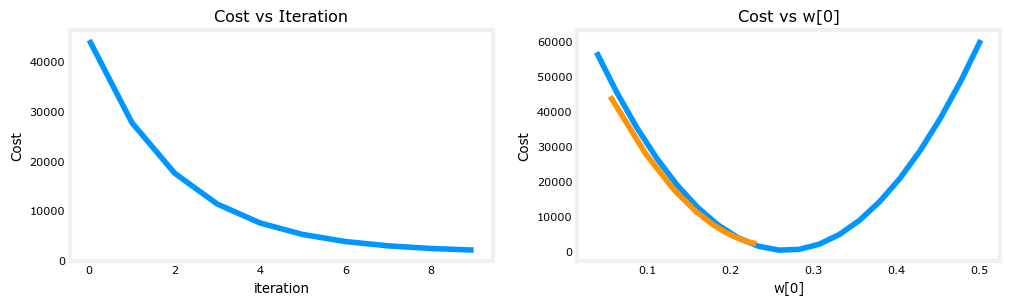

In [11]:
plot_cost_i_w(X_train,y_train,hist)

On the left, you see that cost is decreasing as it should. On the right, you can see that  𝑤0
  is approaching the minimum without oscillations. dj_w0 is negative throughout the run. This solution will also converge.

# Feature Scaling
Three different techniques for feature scaling: 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 


### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [12]:
def z_score_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    mean = np.mean(X,axis=0)
    std_daviation = np.std(X, axis=0)
    z_score = (X - mean)/std_daviation
    return z_score, mean, std_daviation

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

In [13]:
mu = np.mean(X_train , axis=0)
mu

array([1.42e+03, 2.72e+00, 1.38e+00, 3.84e+01])

In [14]:
sigma = np.std(X_train, axis=0)
sigma

array([411.62,   0.65,   0.49,  25.78])

In [15]:
X_train_mean = X_train-mu
X_train_mean

array([[-1.74e+02,  2.83e-01, -3.84e-01,  2.56e+01],
       [ 5.29e+02,  2.83e-01,  6.16e-01, -2.14e+01],
       [ 3.07e+02,  2.83e-01,  6.16e-01,  3.62e+00],
       [ 5.41e+02,  2.83e-01,  6.16e-01, -2.34e+01],
       [-1.04e+02, -7.17e-01, -3.84e-01, -2.44e+01],
       [-5.54e+02, -7.17e-01, -3.84e-01,  2.76e+01],
       [ 4.18e+02,  2.83e-01, -3.84e-01, -2.14e+01],
       [-3.92e+02,  2.83e-01, -3.84e-01,  4.62e+00],
       [ 1.78e+03,  1.28e+00,  6.16e-01,  4.86e+01],
       [-6.30e+02, -7.17e-01, -3.84e-01,  4.16e+01],
       [-2.18e+02, -7.17e-01,  6.16e-01, -2.14e+01],
       [ 1.39e+02, -7.17e-01, -3.84e-01, -2.04e+01],
       [ 1.16e+01,  2.83e-01, -3.84e-01, -1.84e+01],
       [-1.98e+02, -7.17e-01, -3.84e-01, -2.34e+01],
       [-3.26e+02, -7.17e-01, -3.84e-01,  2.56e+01],
       [-5.70e+02, -1.72e+00, -3.84e-01, -2.14e+01],
       [ 2.64e+02,  2.83e-01,  6.16e-01, -1.54e+01],
       [ 3.50e+02,  2.83e-01,  6.16e-01, -2.04e+01],
       [-3.78e+02,  2.83e-01, -3.84e-01,  5.62

In [16]:
z_score= X_train_mean / sigma
z_score

array([[-4.24e-01,  4.34e-01, -7.89e-01,  9.94e-01],
       [ 1.28e+00,  4.34e-01,  1.27e+00, -8.30e-01],
       [ 7.45e-01,  4.34e-01,  1.27e+00,  1.40e-01],
       [ 1.31e+00,  4.34e-01,  1.27e+00, -9.07e-01],
       [-2.54e-01, -1.10e+00, -7.89e-01, -9.46e-01],
       [-1.35e+00, -1.10e+00, -7.89e-01,  1.07e+00],
       [ 1.01e+00,  4.34e-01, -7.89e-01, -8.30e-01],
       [-9.53e-01,  4.34e-01, -7.89e-01,  1.79e-01],
       [ 4.31e+00,  1.97e+00,  1.27e+00,  1.89e+00],
       [-1.53e+00, -1.10e+00, -7.89e-01,  1.61e+00],
       [-5.31e-01, -1.10e+00,  1.27e+00, -8.30e-01],
       [ 3.37e-01, -1.10e+00, -7.89e-01, -7.91e-01],
       [ 2.82e-02,  4.34e-01, -7.89e-01, -7.13e-01],
       [-4.82e-01, -1.10e+00, -7.89e-01, -9.07e-01],
       [-7.93e-01, -1.10e+00, -7.89e-01,  9.94e-01],
       [-1.39e+00, -2.63e+00, -7.89e-01, -8.30e-01],
       [ 6.40e-01,  4.34e-01,  1.27e+00, -5.97e-01],
       [ 8.49e-01,  4.34e-01,  1.27e+00, -7.91e-01],
       [-9.19e-01,  4.34e-01, -7.89e-01,  2.18

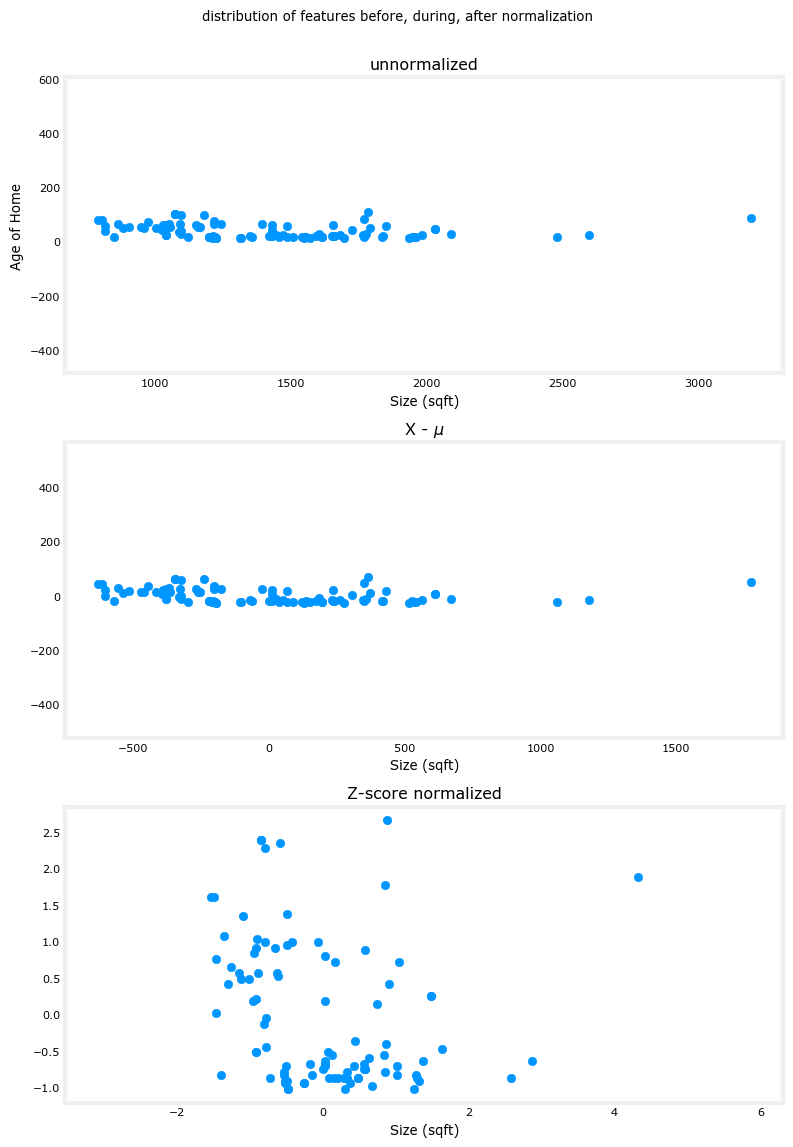

In [17]:
fig,ax = plt.subplots(3,1,figsize=(8,12))

#unnormalized
ax[0].scatter(X_train[:,0],X_train[:,3])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[1])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_train_mean[:,0], X_train_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(z_score[:,0], z_score[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "age" and "size(sqft)". *These are plotted with equal scale*. 
- Unnormalized: The range of values or the variance of the 'size(sqft)' feature is much larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'age' feature, but 'size(sqft)' is clearly around zero.
- Right: The second step divides by the standard deviation. This leaves both features centered at zero with a similar scale.

Let's normalize the data and compare it to the original data.

In [18]:
z_score, mean, std_daviation = z_score_normalize_features(X_train)

In [19]:
print(f"X_mu = {mean}, \nX_sigma = {std_daviation}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(z_score,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


After normalization, the values for each feature are scaled to a much narrower range. The first feature now only spans about 5.85 units, which is much more compact.
This makes it easier to compare different features because their values are now on a similar scale. Instead of having some features ranging over thousands and others over just a few units, they are all in a consistent, smaller range.

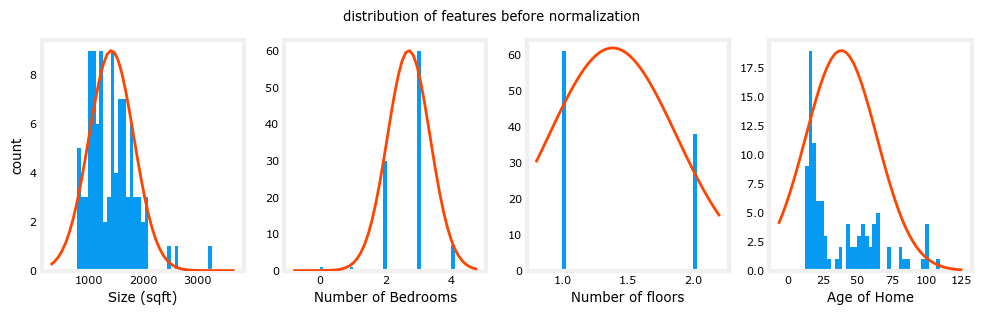

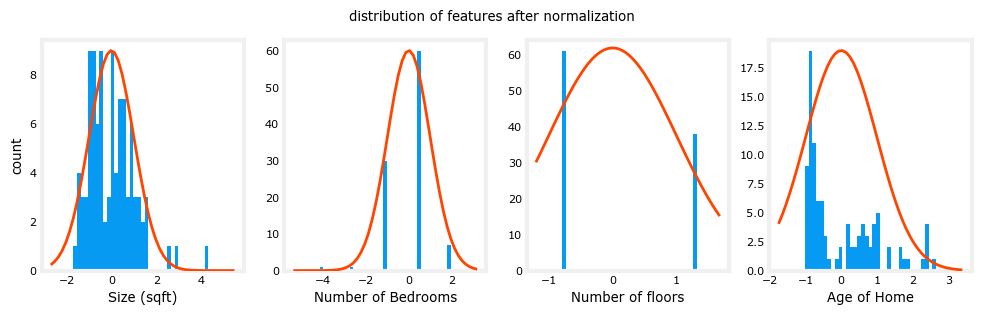

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],z_score[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

Notice, above, the range of the normalized data (x-axis) is centered around zero and roughly +/- 2. Most importantly, the range is similar for each feature.

Let's re-run our gradient descent algorithm with normalized data.
Note the **vastly larger value of alpha**. This will speed up gradient descent.

In [21]:
#set alpha to 1e-7
w_norm,b_norm,hist = run_gradient_descent(z_score, y_train, 1000, alpha = 0.1,)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

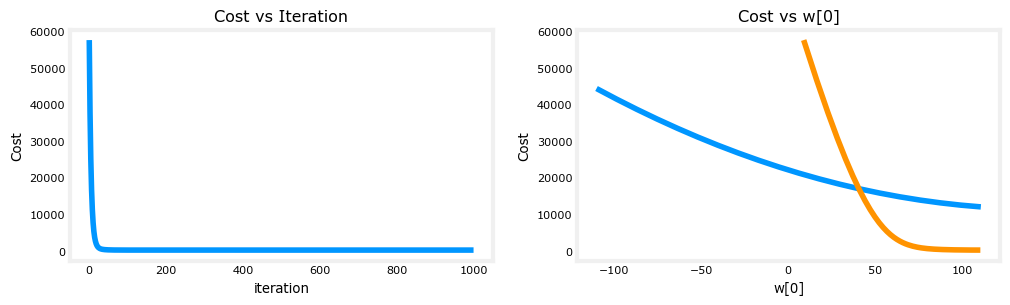

In [22]:
plot_cost_i_w(z_score,y_train,hist)

The scaled features get very accurate results **much, much faster!**. Notice the gradient of each parameter is tiny by the end of this fairly short run. A learning rate of 0.1 is a good start for regression with normalized features.
Let's plot our predictions versus the target values. Note, the prediction is made using the normalized feature while the plot is shown using the original feature values.

In [23]:
z_score.shape

(99, 4)

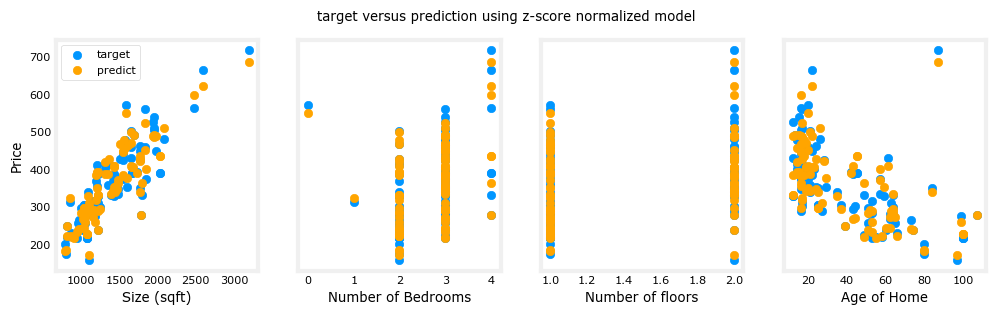

In [24]:
m = X_train.shape[0]  # Use X_train to determine the number of samples
yp = np.zeros(m)
for i in range(m):
    # Assuming z_score is the normalized X_train
    z_score_sample = z_score[i]  # Get the i-th sample's feature vector
    yp[i] = np.dot(z_score_sample, w_norm) + b_norm  # Predict for this sample

# Plot predictions and targets versus original features    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label='target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], yp, color='orange', label='predict')  # Assuming orange is 'dlorange'
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()


The results look good. A few points to note:
- with multiple features, we can no longer have a single plot showing results versus features.
- when generating the plot, the normalized features were used. Any predictions using the parameters learned from a normalized training set must also be normalized.

**Prediction**
The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized. 

In [25]:
prediction_features = np.array([1200,3,1,40])

In [26]:
X_norm , mean, std_daviation =z_score_normalize_features(prediction_features)
X_norm

array([ 1.73, -0.6 , -0.6 , -0.53])

In [27]:
m=X_norm.shape[0]
yp = np.zeros(m)

In [28]:
for i in X_norm:
    yp = np.dot(X_norm, w_norm) + b_norm

In [29]:
yp

607.1050456037531

In [30]:
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${yp*1000:0.0f}")

 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $607105


**Cost Contours**  
Another way to view feature scaling is in terms of the cost contours. When feature scales do not match, the plot of cost versus parameters in a contour plot is asymmetric. 


## Acknowledgments
The housing data was derived from the [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) compiled by Dean De Cock for use in data science education.